# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución. También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`datasets/input/instacart_orders.csv`, `datasets/input/products.csv`, `datasets/input/aisles.csv`, `datasets/input/departments.csv` y `datasets/input/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución



Comenzamos importando los paquetes que necesitamos para el proyecto, después se lee cada archivo CSV como un DataFrame de pandas y se asigna cada uno a su propia variable.

Al ver los archivos CSV, podemos ver que debemos especificar que el separador es un punto y coma.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en DataFrames
orders         = pd.read_csv('datasets/input/instacart_orders.csv', sep=';')
products       = pd.read_csv('datasets/input/products.csv', sep=';')
departments    = pd.read_csv('datasets/input/departments.csv', sep=';')
aisles         = pd.read_csv('datasets/input/aisles.csv', sep=';')
order_products = pd.read_csv('datasets/input/order_products.csv', sep=';')

<font style="color:green">

Para tener una mejor idea de los datos, llamamos `info()` en cada DataFrame. Por defecto, si el DataFrame tiene demasiadas filas, `info()` no mostrará conteos no nulos. Si queremos ver los conteos para `order_products`, debemos incluir `show_counts=True`.

</font>

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones


# Paso 2

Reprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
Vamos a preprocesar los datos investigando los valores ausentes y duplicados para cada uno de los 5 DataFrames.

Nos ocupamos primero de los valores duplicados porque no nos queremos molestar en completar los valores ausentes para filas que podrían estar duplicadas. Después de procesar los duplicados, volveremos a cada DataFrame para procesar los valores ausentes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

<font style="color:green">

La manera más fácil de revisar si hay duplicados es buscar filas totalmente duplicadas llamando a `duplicated()` en el DataFrame sin ningún argumento.

</font>

In [8]:
# Revisa si hay pedidos duplicados
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

<font style="color:green">

¡Tenemos algunas filas duplicadas! Lo que llama la atención de ellas es que todas ocurrieron para los pedidos que se hicieron a las 2:00 a.m. en un miércoles. Para investigar esto, vamos a filtrar la tabla como corresponde.

</font>

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


<font style="color:green">

La tabla filtrada anterior es mucho más larga que el número de filas duplicadas. Esto sugiere que hubo algún error del sistema que hizo que los datos del pedido se escribiesen dos veces durante un corto periodo de tiempo, solo en un miércoles en particular. El conjunto de datos no tiene fechas, así que no podemos decir qué miércoles fue.

Dado nuestro análisis, nos sentimos cómodos eliminando todas las filas duplicadas. Vamos a reiniciar el índice y reasignaremos el DataFrame procesado a `orders`.

Observa que los estudiantes también podrían asignar el DataFrame procesado a una nueva variable.

</font>

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

<font style="color:green">

Ahora vamos a revisar para asegurarnos de que ya no hay filas duplicadas.

</font>

In [11]:
# Vuelve a verificar si hay filas duplicadas
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


<font style="color:green">

Finalmente, vamos a verificar y asegurarnos de que no hay IDs de pedidos duplicadas. Ya que estas IDs identifican de forma única cada pedido, no debería haber ningún duplicado.

</font>

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Parece que fue un miércoles cuando todos los pedidos de las 2:00 a.m. se duplicaron. Eliminamos los pedidos duplicados del conjunto de datos. Observa que hay valores ausentes en la columna `'days_since_prior_order'`. Volveremos a ellos después de ocuparnos de los duplicados en las otras tablas.

### `products` data frame

<font style="color:green">

Después, hacemos la tabla `products`. Nuevamente, comenzamos simplemente revisando si hay filas duplicadas.

</font>

In [13]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


<font style="color:green">

¡Genial, no hay filas duplicadas! Lo siguiente es revisar si hay identificadores únicos duplicados, en este caso, las IDs de los productos.

</font>

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


<font style="color:green">

En este punto, probablemente está bien si el estudiante afirma que no hay ningún duplicado y pasa a la siguiente tabla. Sin embargo, aquí hacemos un poco más de investigación al revisar si hay nombres duplicados de productos.

</font>

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products[products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<font style="color:green">

Hay muchas filas con valores ausentes para el nombre de producto en nuestro resultado filtrado. Vamos a filtrar aún más para excluir estas filas.

</font>

In [16]:
# Verifica si hay nombres duplicados de productos no faltantes.
products[~(products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Parece que hay muchos productos en el conjunto de datos que tienen el mismo nombre, pero distintas IDs de producto. Probablemente, son productos diferentes, así que no los trataremos como duplicados. Por lo tanto, la tabla `products` no contiene valores duplicados.

<font style="color:green">

Ahora, para las tablas `departments`, `aisles` y `order_products`. Hacemos una verificación estándar para las filas totalmente duplicadas y después solo para los duplicados de las IDs únicas. Ninguna de las tablas tiene valores duplicados.

</font>

### `departments` data frame

In [17]:
departments[departments.duplicated()]

,department_id,department


In [18]:
departments[departments.duplicated(subset='department_id')]

,department_id,department


No hay valores duplicados en la tabla `departments`.

### `aisles` data frame

In [19]:
aisles[aisles.duplicated()]

,aisle_id,aisle


In [20]:
aisles[aisles.duplicated(subset='aisle_id')]

,aisle_id,aisle


No valores duplicados en la tabla `aisles`.

### `order_products` data frame

<font style="color:green">

Finalmente, tenemos la enorme tabla  `order_products`. Primero, revisa si hay filas totalmente duplicadas.

</font>

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


<font style="color:green">

Para esta tabla, es un poco complicado revisar si hay identificadores únicos duplicados, ya que no hay una única columna que identifique cada fila de manera exclusiva. En cambio, lo que debe ser único en esta tabla es la combinación de las columnas `'order_id'` y `'product_id'`, ya que ningún producto debe aparecer más de una vez para cada pedido.

Revisar si hay duplicados en el subconjunto de aquellas columnas nos dice que tampoco hay ningún duplicado en esta tabla. ¡A los valores ausentes!

</font>

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


No hay valores duplicados en la tabla `order_products`.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

<font style="color:green">

Ahora que nos hemos encargado de los duplicados, nos ocuparemos de los valores ausentes DataFrame por DataFrame.

Comenzaremos con la tabla `products`, que tiene valores ausentes solo en la columna `'product_name'`. Un buen lugar para empezar es visualizar únicamente las filas en donde falta ese valor.

</font>

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


<font style="color:green">

Es posible que haya un patrón. Parece que la ID del pasillo y la ID del departamento es la mismo para cada fila a la que le falta un nombre de producto. Verifiquemos esto usando código.

Observa que los estudiantes también pueden hacer esto con una línea de código, pero está dividido entre dos celdas.

</font>

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


<font style="color:green">

Así es, cada nombre de producto ausente es del departamento 21 y del pasillo 100. Vamos a usar las tablas `department` y `aisle` para revisar a qué se refieren estas IDs.

</font>

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments['department_id'] == 21]['department'])
print()
print(aisles[aisles['aisle_id'] == 100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object


<font style="color:green">

Tanto aisle como department están etiquetadas como `'missing'`. Estos deben ser datos basura, pero no podemos saberlo a ciencia cierta con los datos que tenemos. Reemplacemos los nombres de productos ausentes con `'Unknown'` y llevemos a cabo nuestro análisis. Después, llamaremos `info()` para asegurarnos de que no hayan quedado valores ausentes.

</font>

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Todos los nombres de productos ausentes tienen una etiqueta `'missing'` para sus departamentos y pasillos correspondientes. Teniendo en cuenta los datos que tenemos, no podemos determinar cómo se llaman estos productos. Así que decidimos remplazar los valores ausentes con el string `'Unknown'`.

### `orders` data frame

<font style="color:green">

Ahora nos ocuparemos de la tabla `orders`, que solo tiene valores ausentes en la columna `'days_since_prior_order'`. De nuevo, vamos a visualizar únicamente las filas en donde el valor está ausente.

</font>

In [28]:
# Encuentra los valores ausentes
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


<font style="color:green">

A primera vista, parece que estos valores ausentes están en las filas que corresponden al primer pedido de los clientes. Verifiquemos con el código.

</font>

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Todos los valores `'days_since_prior_order'` ausentes corresponden a la primera compra de los clientes. ¡Esto tiene sentido porque no existe un pedido anterior! Dejaremos los valores como `NaN` para que la columna pueda permanecer como numérica. Además, los valores `NaN` no deberían interferir con ningún cálculo que podamos hacer usando esta columna.

### `order_products` data frame

<font style="color:green">

Finalmente, tenemos valores ausentes en la columna `'add_to_cart_order'` de la tabla `order_products`. Como en un procedimiento estándar, comenzamos visualizando solo las filas con valores ausentes.

</font>

In [30]:
# Encuentra los valores ausentes
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


<font style="color:green">

Aquí no hay ningún patrón obvio. Investiguemos un poco más mirando con más detenimiento los valores de la columna `'add_to_cart_order'`. Podemos usar `describe()` o `min()`, `max()`, etc.

</font>

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


<font style="color:green">

Un valor mínimo de 1 tiene sentido porque cada pedido necesita, al menos, 1 artículo. Pero, un valor máximo de 64 resulta un tanto curioso. No hay ninguna razón (que no sea mera suerte) para que cualquiera pidiera más de 64 artículos en un pedido.

Además, 64 enciende las alarmas porque es un número de base 2 muy común que surgen con asuntos de informática. Esta es una pista de que quizás el tipo database para esa columna solo admite almacenamiento de 64 bits. Pero no esperamos que nuestros estudiantes sepan esto.

Vamos a verificar si cada pedido con valores ausentes tiene más de 64 artículos en ella. Podemos hacer esto filtrando la tabla para que solo incluya IDs de pedidos con un valor ausente en la columna `'add_to_cart_order'`. Esto es difícil porque queremos mantener todas las filas para cada uno de esos pedidos, y no únicamente las filas con valores ausentes.

Hacer una lista de las IDs de pedidos que se relacionan con un valor ausente nos podría ayudar.

</font>

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
miss_cart_order_ids = sorted(list(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()))

<font style="color:green">

Ahora solo nos resta filtrar la tabla de modo que la ID de pedido esté en la lista `miss_cart_order_ids`, agrupa por ID, y utiliza el método `size()` o `count()` para contar el número de filas en cada grupo (cada fila corresponde a un artículo en el pedido).

Debemos encontrar el número mínimo de artículos de todos estos pedidos. Una manera de hacerlo es simplemente ordenar los resultados en orden ascendente.

</font>

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_grp = order_products[order_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id')
orders_grp['product_id'].count().min()

65

<font style="color:green">

Como era de esperarse, cada pedido relacionado con un valor ausente tiene más de 64 artículos en ella.

Ya que no podemos saber en qué pedido se agregaron al carrito los artículos con valores ausentes para aquellos pedidos con más de 65 artículos, completaremos los valores ausentes con un valor de marcador de posición numérico que no pueda confundirse con daros reales; por ejemplo, 999.

Ahora que ya hemos completado todos los valores ausentes, no hay más `NaN` en la columna, así que podemos convertirlo de `float` a `int`. Tiene sentido que sean enteros para que se pueda sumar el pedido del carrito.

Llamamos `info()` para asegurarnos de que los valores ausentes estén llenos y que el tipo de datos se haya convertido.

Los estudiantes podrían elegir aquí ocuparse de sus valores ausentes de manera distinta, lo que está bien.

</font>

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Por alguna razón, cualquier artículo que haya sido el sexagésimo quinto o posterior en añadirse al carrito tiene un valor ausente en la columna `'add_to_cart_order'`. Podría ser que los tipos de datos de aquella columna en la base de datos solo pudieran contener valores enteros del 1 al 64. Decidimos remplazar los valores ausentes con un valor de código, 999, que representa un unknown en los pedidos mayores a 64. También convertimos la columna al tipo de datos entero. Solo debemos recordar esto si realizamos cálculos usando esta columna durante nuestro análisis.

Otros valores de código razonables que podríamos haber usado son 0 o -1, ya que no se muestran en ninguna otra parte del conjunto de datos y no tienen ningún significado físico real para esta variable.

También observa que, para los pedidos con exactamente 65 artículos, pudimos remplazar el valor ausente con 65. Pero olvidemos eso por ahora, ya que no podemos determinar cuál es el sexagésimo quinto artículo para todas los pedidos con 66 artículos o más.

## Conclusiones

Escribe aquí tus conclusiones


# [A] Fácil (hay que completar todo para aprobar)

### [A1] Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean sensibles (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).

<font style="color:green">

Hay 24 horas en un día, y 7 días en una semana. Esperamos que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` reflejen esto. Una manera directa de hacer esto es mostrar los valores únicos en cada columna. La salida no tiene que estar ordenada, pero el ordenamiento los hace más fácil de leer.

Todo parece estar en su lugar, así que podemos continuar.

</font>

In [35]:
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### [A2] ¿A qué hora del día compran víveres las personas?

<font style="color:green">

Queremos graficar el número de pedidos realizados para cada hora del día. Una gráfica de barras es muy buena para esto, pues en nuestros datos la hora del día es una variable discreta.

Ya que cada fila en `orders` corresponde a una orden única, podemos simplemente contar cuántas veces ocurre cada hora del día en `orders` y trazar el resultado en un gráfico de barras.

Como `value_counts()` devuelve como su índice un objeto Series con los valores `'order_hour_of_day'` únicos, debemos llamar `sort_index()` para asegurarnos de que las barras del eje X se tracen en el orden adecuado.

Debemos animar a los estudiantes a que también incluyan `plt.show()` en cada celda con un gráfico.

</font>

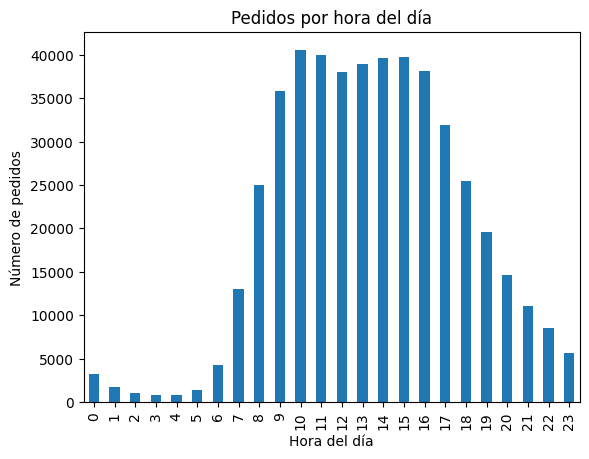

In [37]:
hour_of_day_counts = orders['order_hour_of_day'].value_counts().sort_index()
hour_of_day_counts.plot(kind='bar',
                        title='Pedidos por hora del día',
                        xlabel='Hora del día',
                        ylabel='Número de pedidos'
                       )
plt.show()

La mayoría de los pedidos se hacen entre las 9:00 a.m. y las 5 p.m., con picos a las 10:00 a.m. y 3:00 p.m.

### [A3] ¿Qué día de la semana compran víveres las personas?

<font style="color:green">

Esta pregunta es muy parecida a la anterior. La única diferencia es que vamos a trazar barras para la columna `'order_dow'`.

</font>

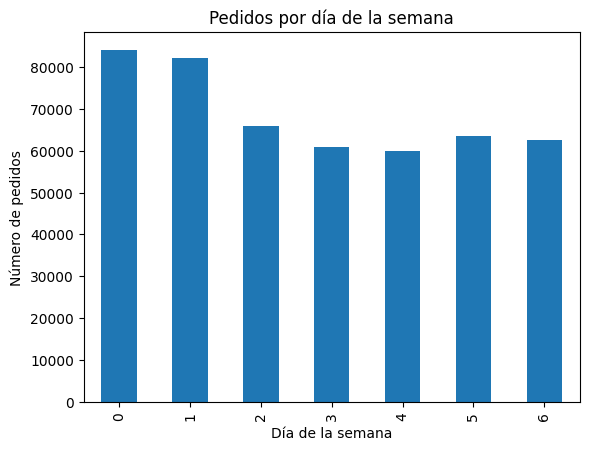

In [38]:
day_of_week_counts = orders['order_dow'].value_counts().sort_index()
day_of_week_counts.plot(kind='bar',
                        title='Pedidos por día de la semana',
                        xlabel='Día de la semana',
                        ylabel='Número de pedidos'
                       )
plt.show()

El diccionario de datos no especifica qué entero corresponde a qué día de la semana. Este especifica que domingo = 0, entonces las personas hicieron más pedidos al inicio de la semana (domingo y lunes).

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

<font style="color:green">

Los valores en `'days_since_prior_order'` deben ser discretos, así que un gráfico de barras viene bien aquí también.

</font>

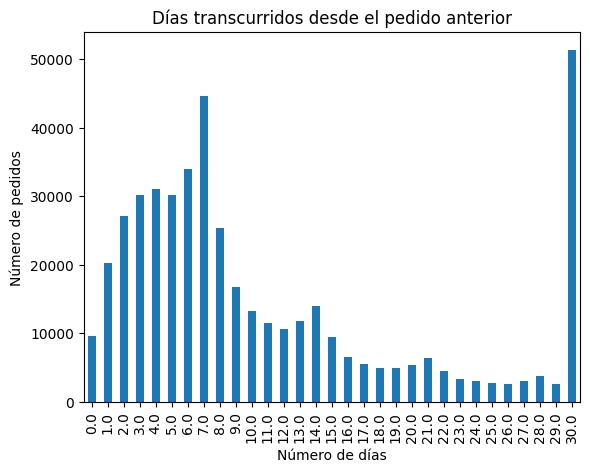

In [39]:
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar',
                                                                  title='Días transcurridos desde el pedido anterior',
                                                                  xlabel='Número de días',
                                                                  ylabel='Número de pedidos'
                                                                 )
plt.show()

<font style="color:green">

¿Qué pasa con todos los valores 0? Esta columna no tiene valores ausentes (para cuando un cliente haga su primer pedido), pero nunca los completamos y, de todos modos, los valores `NaN` no se incluyen en el gráfico. Por ello, un valor de 0 probablemente signifique que el cliente ya ha hecho un pedido diferente en el mismo día.

El valor máximo de 30 días implica que el conjunto de datos está destinado solo a incluir pedidos que se hayan hecho hace 30 días o menos que un pedido anterior (y los pedidos de primera vez). El gran pico en los valores es bastante extraño. Quizás muchos clientes hacen pedidos de inscripción que automáticamente piden los mismos pedidos una vez al mes. O quizás el proceso de entrada de entradas tenía fallas y todos los pedidos que se hicieron 30 días o más después de la orden anterior se establecieron a un valor máximo de 30. No podemos saberlo.

</font>

Los valores 0 probablemente corresponden a clientes que hicieron más de un pedido en el mismo día.

Aún así, el valor máximo de 30 días y el alto pico en ese valor resulta desconcertante. El pico podría explicarse por las personas que configuraron sus inscripciones para que se hiciera un pedido automáticamente una vez al mes. Pero no explica por qué no hay valores superiores a 30 días. Yo esperaría que muchos clientes hicieran pedidos menos de una vez al mes. Quizás esos clientes fueron intencionalmente excluidos del conjunto de datos.

Sin tener en cuenta el pico a los 30 días, la mayoría de las personas esperan entre 2 y 10 días entre pedidos. El tiempo de espera más común es de 7 días. En otras palabras, es normal que las personas hagan un pedido semanal de víveres. Resulta interesante que, en la cola de la distribución también vemos pequeños picos a los 14, 21 y 28 días. Estos corresponderían a pedidos realizados cada 2, 3 o 4 semanas.

# [B] Intermedio (deben completarse todos para aprobar)

<font style="color:green">

Queremos trazar otro histograma o gráfico de barras en donde el eje X sea la hora del día, pero esta vez queremos trazar dos distribuciones en la misma figura: miércoles y sábado.

Nuestro enfoque aquí es filtrar `orders` para que quedarnos únicamente con los pedidos de los miércoles, y después contar los valores en la columna `'order_hour_of_day'`. Después hacemos lo mismo para los sábados. Finalmente, podemos combinar los resultados en un DataFrame que usemos para trazar los gráficos de barra.

Comencemos creando los conteos filtrados.

</font>

### [B1] ¿Hay alguna diferencia entre las distribuciones `'order_hour_of_day'` en miércoles y sábados? Traza gráficos de barras para los dos días y describe las diferencias que veas.

In [40]:
wed_mask = orders['order_dow'] == 3
hod_counts_wed = orders[wed_mask]['order_hour_of_day'].value_counts().sort_index()

hod_counts_wed

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [41]:
sat_mask = orders['order_dow'] == 6
hod_counts_sat = orders[sat_mask]['order_hour_of_day'].value_counts().sort_index()

hod_counts_sat

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

<font style="color:green">

Después creamos un DataFrame con dos columnas: una para miércoles y otra para sábado. Si no cambiamos el nombre de las columnas, ambas tendrán el mismo nombre (es decir, `'order_hour_of_day'`).

</font>

In [42]:
hod_counts = pd.concat([hod_counts_wed, hod_counts_sat], axis=1)
hod_counts.columns = ['Miércoles', 'Sábado']
hod_counts

,Miércoles,Sábado
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


<font style="color:green">

Lo único que tenemos que hacer ahora es crear un gráfico de barras.

</font>

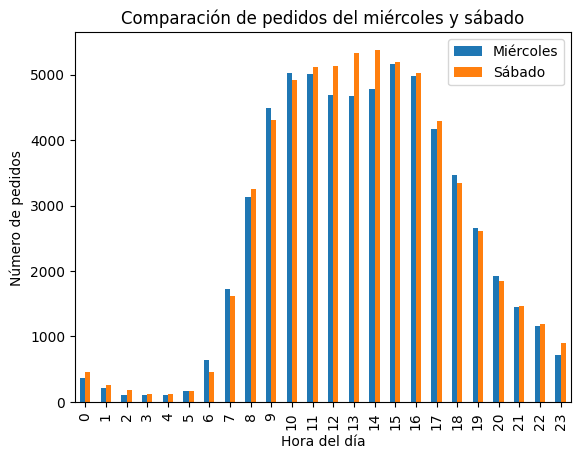

In [43]:
hod_counts.plot(kind='bar',
                title='Comparación de pedidos del miércoles y sábado',
                xlabel='Hora del día',
                ylabel='Número de pedidos'
               )
plt.show()

Hay una pequeña caída de 11 a.m. a 13 p.m. los miércoles. No hay esta caída los sábados. Quizás esta caída puede atribuirse a las personas que no usan Instacart porque almuerzan entre las 11 a.m. y 13 p.m.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<font style="color:green">

La estrategia aquí es hallar el número total de pedidos para cada cliente único, después trazar un gráfico de barras o un histograma en donde el eje X sea el número de pedidos.

Podemos usar la tabla `orders` para contar el número de pedidos para cada usuario usando las IDs de usuarios para diferenciar clientes.

</font>

In [44]:
order_count_per_user = orders.groupby('user_id')['order_id'].count().sort_values()
order_count_per_user

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

<font style="color:green">

Ahora trazamos el histograma del resultado. El número de contenedores puede variar en tanto el histograma sea representativo de la distribución. Un gráfico de barras también es aceptable aquí, ya que estamos tratando con un número relativamente pequeño de valores discretos en el eje X.

</font>

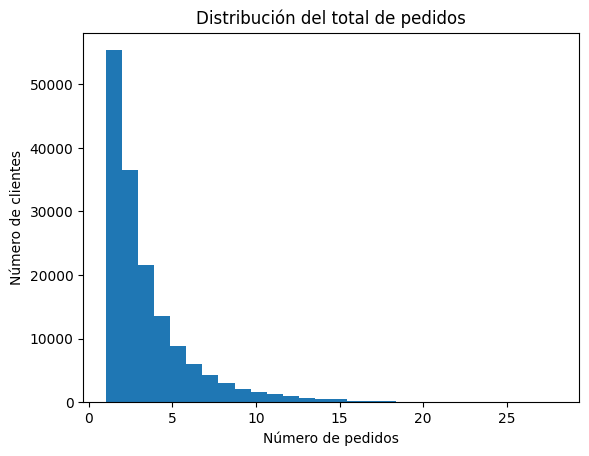

In [45]:
order_count_per_user.plot(kind='hist',
                          bins=28,
                          title='Distribución del total de pedidos'
                         )
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.show()

La mayoría de clientes en el conjunto de datos hizo entre 1 y 10 pedidos, y estos fueron disminuyendo considerablemente después de 1 pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

<font style="color:green">

Esta pregunta no requiere ninguna figura, pero en la solución se incluye un gráfico de barras en caso de que los estudiantes hagan uno y deseen compararlo con algo.

Esta es la primera pregunta que requiere una fusión. Debemos fusionar `products` con `order_products` de modo que podamos mostrar en la misma tabla tanto las IDs como los nombres de los productos.

</font>

In [46]:
df_merge = order_products.merge(products, on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


<font style="color:green">

Solo tenemos que contar el número de filas para cada producto, ordenar el resultado en orden descendiente y visualizar únicamente las primeras 20 filas.

Podríamos obtener los conteos correctos si los agrupamos por IDs de producto, pero también queremos mostrar los nombres de los productos. Ya que cada ID de producto mapea solo un nombre de producto, los podemos agrupar tanto por ID como por nombre sin alterar el conteo. Hacer esto nos permite ver los nombres y las IDs en nuestro resultado.

Ten en cuenta que los alumnos podrían encontrar otras maneras de lograr este resultado.

</font>

In [47]:
top_products = df_merge.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False)
top_products.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,Banana,66050,66050,66050,66050,66050
13176,Bag of Organic Bananas,53297,53297,53297,53297,53297
21137,Organic Strawberries,37039,37039,37039,37039,37039
21903,Organic Baby Spinach,33971,33971,33971,33971,33971
47209,Organic Hass Avocado,29773,29773,29773,29773,29773
47766,Organic Avocado,24689,24689,24689,24689,24689
47626,Large Lemon,21495,21495,21495,21495,21495
16797,Strawberries,20018,20018,20018,20018,20018
26209,Limes,19690,19690,19690,19690,19690


<font style="color:green">

A continuación encontrarás un gráfico de barras del número de veces en que se pidieron cada uno de los 20 principales artículos.

</font>

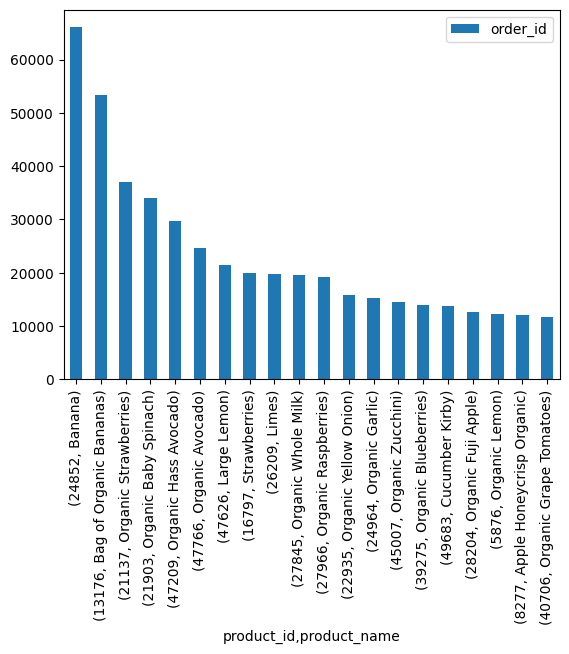

In [48]:
top_products.head(20).plot.bar(y='order_id')
plt.show()

Los 20 principales artículos son todos productos agrícolas, excepto por la leche. ¡Parece que a las personas les gusta lo delicioso y nutritivo!

# [C] Difícil (hay que completar todo para aprobar)

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<font style="color:green">

La pregunta sobre "normalmente" implica que queremos saber el número promedio de artículos que se agregan en un pedido. También queremos graficar una distribución que muestre esto visualmente.

Primero, debemos contar el número de productos en cada pedido. Podemos hacerlo usando la tabla `order_products`, agrupando por las IDs de pedido, y después utilizando las IDs de producto para contar el número de productos en cada pedido.

</font>

In [49]:
num_items = order_products.groupby('order_id').count()['product_id']
histogram_vals = num_items.value_counts().sort_index()
histogram_vals

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

<font style="color:green">

Y ahora solo tenemos que trazar un gráfico de barras o un histograma. Incluso si los valores son discretos, en este caso, probablemente sea mejor un histograma, ya que hay demasiados valores. Aunque un gráfico de barras también es aceptable.

</font>

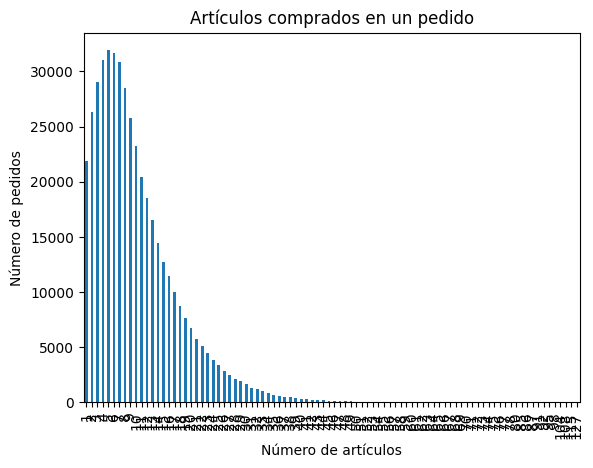

In [50]:
histogram_vals.plot(kind='bar',
                title='Artículos comprados en un pedido',
                xlabel='Número de artículos',
                ylabel='Número de pedidos'
               )
plt.show()

<font style="color:green">

El gráfico anterior está bien, pero es difícil ver los detalles alrededor del valor "típico" porque hay muchos tamaños de pedidos que tienen una representación muy pequeña en el conjunto de datos.

Si excluimos de nuestro gráfico la mayoría de los tamaños grandes, podemos tener una mejor idea de la distribución alrededor del valor típico.

</font>

La mayoría de los números de pedidos están en la cola de la distribución. Para poder ver mejor la parte que no está en la cola, vamos a elegir un valor en la cola como un corte y únicamente graficaremos los pedidos menores a esa cantidad de artículos. Un tamaño de pedido de 35 artículos está lo suficientemente lejos de la cola como para ello.

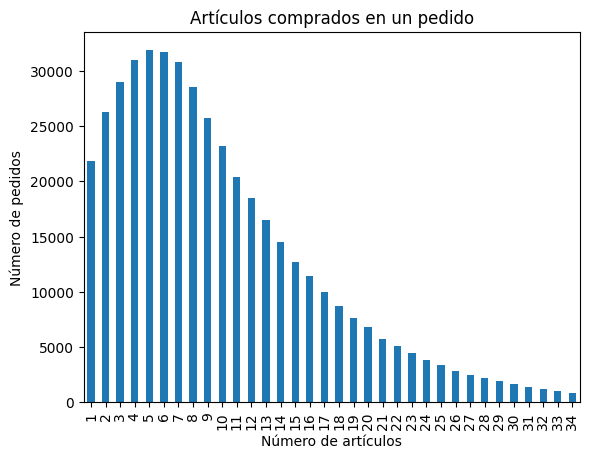

In [51]:
histogram_vals[histogram_vals.index < 35].plot(kind='bar',
                title='Artículos comprados en un pedido',
                xlabel='Número de artículos',
                ylabel='Número de pedidos'
               )
plt.show()

Un pedido típico contiene 5 o 6 artículos; y la mayoría de los pedidos tienen entre 1 y 20 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

<font style="color:green">

Esta pregunta comparte elementos con algunas de las preguntas anteriores. Nuestra estrategia es filtrar la tabla `order_products` para que solamente trabajemos con artículos que volvieron a pedirse, y después usemos la tabla filtrada para encontrar los 20 principales artículos que se piden. Para mostrar sus nombres e IDs, debemos fusionarla con la tabla `products`, tal como hicimos anteriormente.

Comencemos filtrando.

</font>

In [52]:
reorder_products = order_products[order_products['reordered'] == 1]
reorder_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1
10,925051,9421,2,1


<font style="color:green">

Después, fusionamos la tabla filtrada con la tabla `products` para obtener los nombres e IDs en la misma tabla.

</font>

In [53]:
df_merge = reorder_products.merge(products, on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,Bag Of Ice,37,1
1,761899,1560,2,1,Bag Of Ice,37,1
2,1388514,1560,8,1,Bag Of Ice,37,1
3,2629631,1560,1,1,Bag Of Ice,37,1
4,866921,1560,6,1,Bag Of Ice,37,1
...,...,...,...,...,...,...,...
2683833,1338379,33506,3,1,Simply 9 White Meat Chicken & Whole Barley Rec...,40,8
2683834,191894,27878,3,1,Crackers Wheat Sundried Tomato Basil Crispy,78,19
2683835,3041739,31751,14,1,French Style Cut Green Beans,116,1
2683836,949244,24384,18,1,Invisible Matte Finish Tape,10,17


<font style="color:green">

Y ahora agrupamos por las IDs y nombres de productos, contamos el tamaño de cada grupo, los ordenamos en orden descendente, y mantenemos las primeras 20 filas; tal como lo hicimos antes.

</font>

In [54]:
top_reordered_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_reordered_products.head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

<font style="color:green">

La pregunta no requiere un gráfico de barras, pero incluimos uno aquí por cualquier cosa.

</font>

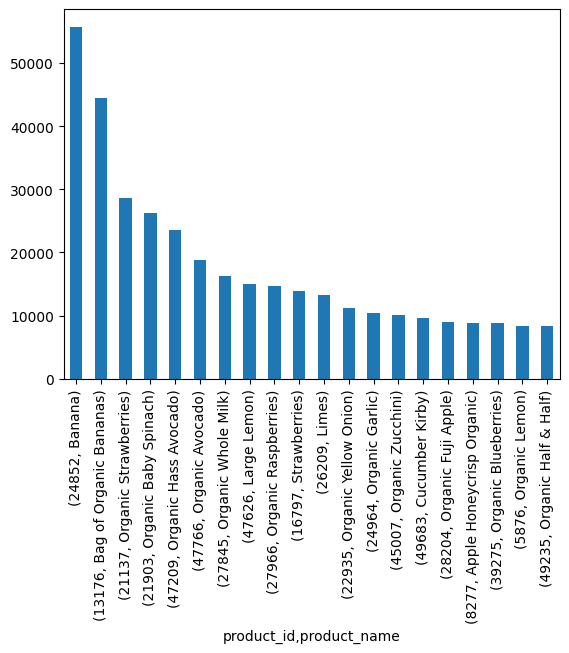

In [55]:
top_reordered_products.head(20).plot.bar()
plt.show()

Parece que los productos agrícolas y los lácteos también son los productos que más se vuelven a pedir. Y es normal que los perecederos sean los artículos que más se pidan nuevamente.

### [C3] Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

<font style="color:green">

La idea aquí es calcular para cada producto:

tasa de repetición de pedido = (número de repeticiones de pedido) / (total de pedidos)

También queremos incluir los nombres e IDs de productos junto con la tasa de repetición de pedido, así que nuevamente debemos fusionar `order_products` con `products`.

Comencemos por asegurarnos de que la columna `'reordered'` únicamente contenga 1 (pedido nuevamente) y 0 (primer pedido). Ten en cuenta que está bien si un estudiante omite este paso, pero es una buena práctica comprobar siempre que los valores de columnas tengan sentido, especialmente cuando es fácil hacerlo.

</font>

In [56]:
order_products['reordered'].unique()

array([0, 1], dtype=int64)

<font style="color:green">

Perfecto, se ve bien. Ahora, vamos a usar el DataFrame fusionado para crear un Series de dos índices en donde el índice contenga los nombres e IDs de productos, y los valores de Series sean las tasas de repetición de pedido.

Podemos utilizar `mean()` para calcular las tasas aquí, ya que los valores son solo 0 y 1.

</font>

In [57]:
df_merge = order_products.merge(products)
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()
reorder_rate

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

<font style="color:green">

El paso final es convertir el Series anterior en un DataFrame con tres columnas. La manera más sencilla de hacer esto es llamar `reset_index()`.

Nosotros ordenamos los valores por ID de producto antes de mostrarlos, pero no es necesario.

También observa que la última columna aún tiene el nombre de `'reordered'`, así que los estudiantes deben cambiarlo por un mejor nombre, si así lo desean.

</font>

In [58]:
reorder_rate_as_df = reorder_rate.sort_values(ascending=False).reset_index()
reorder_rate_as_df.sort_values(by='product_id')

,product_id,product_name,reordered
12126,1,Chocolate Sandwich Cookies,0.564286
43403,2,All-Seasons Salt,0.000000
3834,3,Robust Golden Unsweetened Oolong Tea,0.738095
14955,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
18024,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
2623,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
21509,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
22342,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
21155,49693,SPRING WATER BODY WASH,0.440000


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

<font style="color:green">

Esta pregunta es parecida a la anterior, excepto que queremos calcular la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

A pesar de que los usuarios no tienen nombre en este conjunto de datos, debemos hacer una fusión para que en la misma tabla obtengamos la columna `'reordered'` y la columna `'user_id'`.

Comenzamos haciendo la fusión, agrupando por ID de usuario, y llamando `mean()` en la columna `'reordered'` para calcular la tasa de repetición de pedido.

</font>

In [59]:
df_merge = order_products.merge(orders)
reorder_pct = df_merge.groupby('user_id')['reordered'].mean()
reorder_pct

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

<font style="color:green">

Aquí no se pregunta si esto es un DataFrame con dos columnas, así que el resultado anterior está bien. Pero, si queremos, podemos usar nuevamente `reset_index()` para convertirlo en un DataFrame.

</font>

In [60]:
reorder_pct_as_df = reorder_pct.sort_values(ascending=False).reset_index()
reorder_pct_as_df

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

<font style="color:green">

Queremos mostrar los nombres, IDs y conteos para los 20 artículos que más frecuentemente son el primer artículo en seleccionarse en un pedido.

Nuestra estrategia es fusionar tablas, filtrar la tabla fusionada para que solo mantengamos las filas de los productos que agregamos primero al carrito, después contamos cuántas filas tenemos para cada producto único y mantenemos únicamente las 20 principales.

Vamos a empezar por fusionar y filtrar.

</font>

In [61]:
df_merge = order_products.merge(products)
first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]
first_in_cart

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,Chicken Breast Tenders Breaded,129,1
17,2201430,11440,1,1,Chicken Breast Tenders Breaded,129,1
21,1036054,11440,1,1,Chicken Breast Tenders Breaded,129,1
50,3008652,11440,1,1,Chicken Breast Tenders Breaded,129,1
62,2946144,11440,1,1,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,Sensitive Night Cream,73,11
4544977,1776450,21507,1,0,Gluten Free All-Purpose Rice Flour Blend,17,13
4544995,2333206,25467,1,0,Madagascar Pure Vanilla,17,13
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


<font style="color:green">

Ahora que ya tenemos una tabla debidamente filtrada con la cual trabajar, podemos agrupar por nombre e ID de producto y simplemente contar cuántas filas hay para cada grupo. Vamos a ordenar los valores en orden descendente para que podamos ver los más frecuentes.

</font>

In [62]:
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
first_count

product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: product_id, Length: 26760, dtyp

<font style="color:green">

El resultado anterior debería ser suficiente, pero podemos llamar `reset_index()` si queremos convertir nuestro resultado en un DataFrame. En este caso, debemos usar el parámetro `name=`, de otro modo, obtendremos un error por tener dos columnas con el mismo nombre.

</font>

In [63]:
first_count_as_df = first_count.reset_index(name='count')
first_count_as_df.head(20)

,product_id,product_name,count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


Los productos que con mayor frecuencia se agregan primero en el carrito son productos agrícolas, lácteos y bebidas tales como gaseosas o agua. En realidad no podría decir por qué es así sin tener experiencia usando Instacart, ya que esto podría tener más que ver con el diseño de la aplicación que con las propiedades de los productos. Lo que sí puedo ver es que hay una gran superposición entre este resultado y el anterior sobre los tipos de artículos más populares y que más vuelven a pedirse. Simplemente podría deberse a que la aplicación da prioridad a los artículos populares como las primeras sugerencias de compras, así que solamente es más fácil para los clientes agregar primero estos artículos a su carrito.